In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset

In [4]:
bank_data = pd.read_csv('Bank_Customer_retirement.csv')

In [5]:
bank_data


,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1
...,...,...,...,...
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1


In [7]:
bank_data.keys()

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

In [8]:
bank_data.shape

(500, 4)

In [9]:
bank_data.head(10)

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1
5,5,50.499789,742398.9068,1
6,6,39.573302,578650.3156,0
7,7,55.159309,533821.2011,1
8,8,30.791271,459592.4084,0
9,9,40.456073,396800.2509,0


In [10]:
bank_data.tail(10)

,Customer ID,Age,401K Savings,Retire
490,490,57.216789,926205.9231,1
491,491,56.856234,811243.3859,1
492,492,36.715155,499613.6159,0
493,493,50.646174,612945.0029,1
494,494,50.970160,224468.4001,0
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


visualize the data

In [14]:
sns.pairplot(bank_data, hue = 'Retire', vars = ['Age', '401K Savings'])


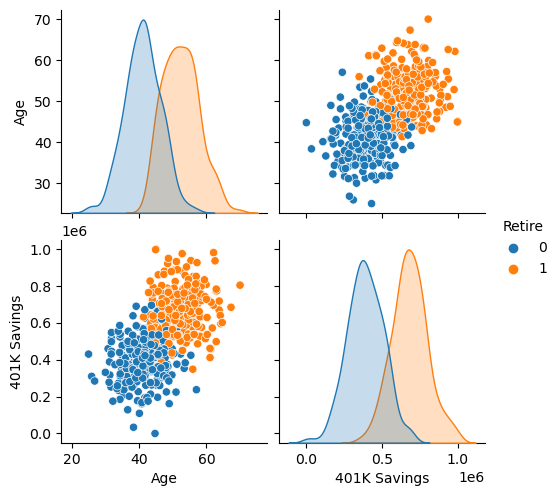

In [15]:
plt.show()

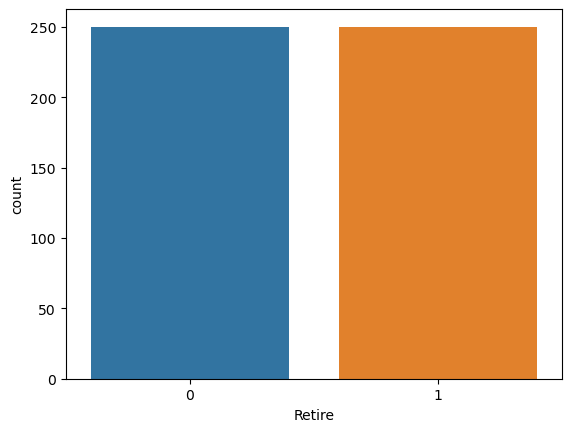

In [20]:
sns.countplot(x = 'Retire', data = bank_data, label = 'Retirement')
plt.show()

Model training

In [21]:
bank_data = bank_data.drop(['Customer ID'], axis = 1)

In [22]:
bank_data

,Age,401K Savings,Retire
0,39.180417,322349.8740,0
1,56.101686,768671.5740,1
2,57.023043,821505.4718,1
3,43.711358,494187.4850,0
4,54.728823,691435.7723,1
...,...,...,...
495,46.678128,704243.0776,1
496,43.545007,483175.9998,0
497,46.476724,354919.1987,0
498,50.903631,639789.9219,1


Target

In [23]:
X = bank_data.drop(['Retire'], axis = 1)

In [24]:
X

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723
...,...,...
495,46.678128,704243.0776
496,43.545007,483175.9998
497,46.476724,354919.1987
498,50.903631,639789.9219


In [25]:
y = bank_data['Retire']

In [26]:
y

0      0
1      1
2      1
3      0
4      1
      ..
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

In [27]:
X.shape

(500, 2)

In [28]:
y.shape

(500,)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 5)

In [38]:
X_train.shape

(400, 2)

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

Evalute the model

In [41]:
y_predict = svc_model.predict(X_test)

In [42]:
cm = confusion_matrix(y_test, y_predict)

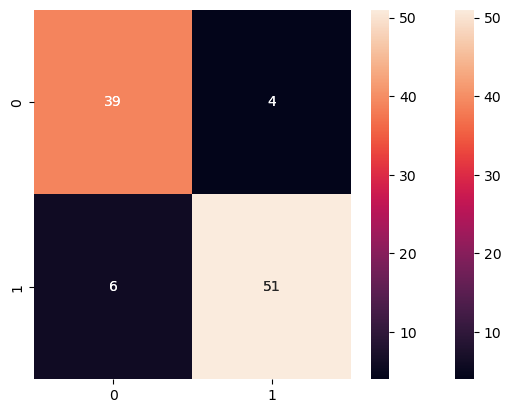

In [44]:
sns.heatmap(cm, annot = True)
plt.show()

In [46]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        43
           1       0.93      0.89      0.91        57

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



Improving the model

In [47]:
min_train = X_train.min()

In [48]:
range_train = (X_train - min_train).max()

In [49]:
X_train_scaled = (X_train - min_train)/range_train

In [50]:
X_train_scaled #data normalised

,Age,401K Savings
247,0.488640,0.684860
390,0.731713,0.651642
186,0.636117,0.669911
484,0.544773,0.718011
139,0.455655,0.363796
...,...,...
486,0.315494,0.033828
189,0.281290,0.374391
495,0.512265,0.704240
206,0.510404,0.626791


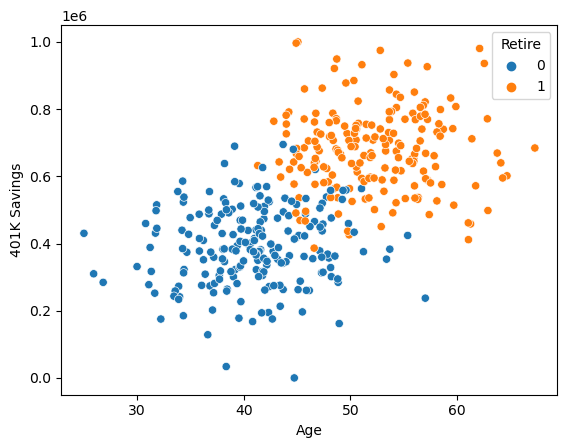

In [54]:
sns.scatterplot(x = X_train['Age'], y = X_train['401K Savings'], hue = y_train)
plt.show()

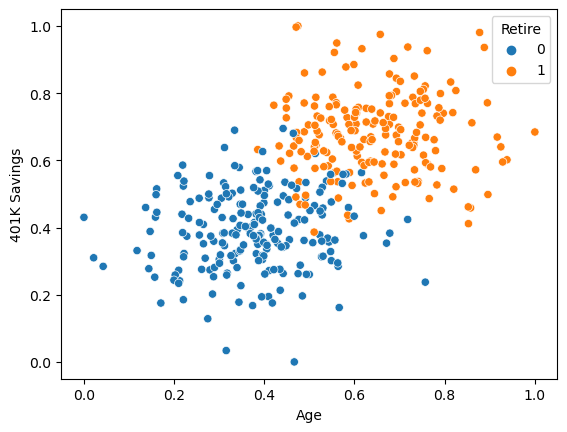

In [55]:
sns.scatterplot(x = X_train_scaled['Age'], y = X_train_scaled['401K Savings'], hue = y_train)
plt.show()

In [56]:
min_test = X_test.min()

In [57]:
range_test = (X_test - min_test).max()

In [58]:
X_test_scaled = (X_test - min_test)/range_test

In [59]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

In [60]:
y_predict = svc_model.predict(X_test_scaled)

In [61]:
cm = confusion_matrix(y_test, y_predict)

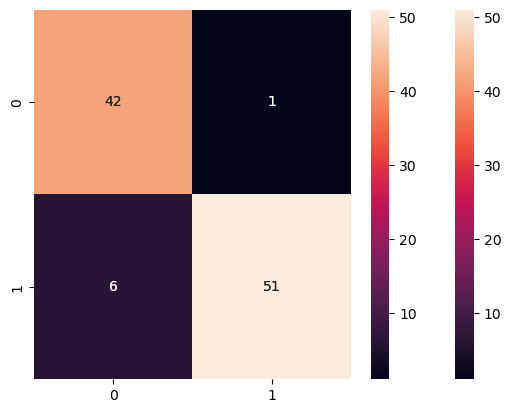

In [63]:
sns.heatmap(cm, annot = True)
plt.show()

In [64]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.89      0.94        57

    accuracy                           0.93       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100



Improving the model-part 2

In [65]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [68]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.975 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.537 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [69]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [70]:
grid.best_estimator_

SVC(C=0.1, gamma=1)

In [71]:
grid_predictions = grid.predict(X_test_scaled)

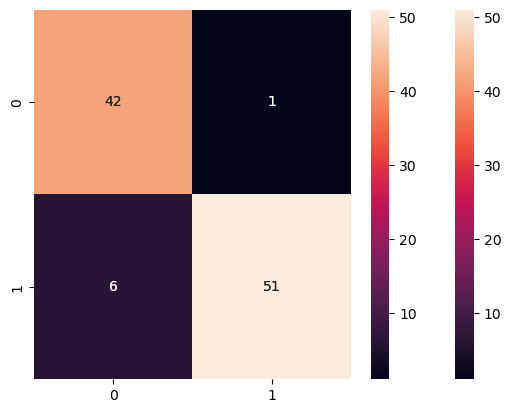

In [73]:
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot = True)
plt.show()

In [74]:
print(classification_report(y_test,grid_predictions))


              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.89      0.94        57

    accuracy                           0.93       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100

